In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

def plot_accuracy_vs_parameters(df, parameters, accuracy_col='accuracy'):
    """
    Plots accuracy as a function of a set of parameters.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot against accuracy.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    for param in parameters:
        plt.figure(figsize=(5, 3))
        sns.lineplot(data=df, x=param, y=accuracy_col, marker='o', ci=None)
        plt.title(f'Accuracy vs {param}')
        plt.xlabel(param)
        plt.ylabel('Accuracy')
        plt.show()

import itertools

def plot_2way_combinations(df, parameters, accuracy_col='accuracy'):
    """
    Plots 2-way combinations of parameters with accuracy as color.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    combinations = list(itertools.combinations(parameters, 2))
    
    for (param1, param2) in combinations:
        plt.figure(figsize=(5, 3))
        scatter = plt.scatter(data=df, x=param1, y=param2, c=accuracy_col, cmap='viridis')
        plt.colorbar(scatter, label='Accuracy')
        plt.title(f'{param1} vs {param2} with Accuracy as Color')
        plt.xlabel(param1)
        plt.ylabel(param2)
        plt.show()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("zadorlab/spatial-transformer-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

summary_df['accuracy'] = 100 * summary_df['eval/accuracy']

# Concatenate the flattened DataFrames along with the 'name' column
runs_df = pd.concat([summary_df, config_df], axis=1)
runs_df.head(15)

,_runtime,_step,_timestamp,eval/accuracy,eval/loss,eval/runtime,eval/samples_per_second,eval/steps_per_second,pool_weight,total_flos,...,model.position_encoding_type,position_encoding_type,model.use_relative_positions2,model.relative_positions.enabled,model.relative_positions.absolute_Z,model.relative_positions.encoding_dim,model.relative_positions.encoding_type,model.single_cell_vs_group_weight,single_cell_vs_group_weight,model.absolute_Z
0,5744.323387,1043.0,1.730492e+09,0.704274,0.823354,7.2254,15545.084,3.875,0.5,1.804762e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6063.282360,1043.0,1.730493e+09,0.704558,0.833165,7.4862,15003.637,3.740,0.5,1.804762e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5932.919495,1043.0,1.730493e+09,0.704558,0.833165,7.2208,15555.130,3.878,0.5,1.804762e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5779.942081,1043.0,1.730492e+09,0.704558,0.833165,7.1966,15607.302,3.891,0.5,1.804762e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5812.139808,1043.0,1.730492e+09,0.704558,0.833165,7.3975,15183.522,3.785,0.5,1.804762e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5814.553576,1043.0,1.730492e+09,0.704558,0.833165,7.2332,15528.492,3.871,0.5,1.804762e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3927.434072,695.0,1.730493e+09,0.609402,1.136105,7.6675,14648.845,3.652,0.5,1.703214e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3962.117233,695.0,1.730493e+09,0.609402,1.136105,7.8596,14290.837,3.563,0.5,1.703214e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3816.979402,695.0,1.730492e+09,0.609402,1.136105,7.0328,15970.778,3.981,0.5,1.703214e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3849.253328,695.0,1.730492e+09,0.667236,0.929194,6.7397,16665.541,4.155,0.5,1.703214e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


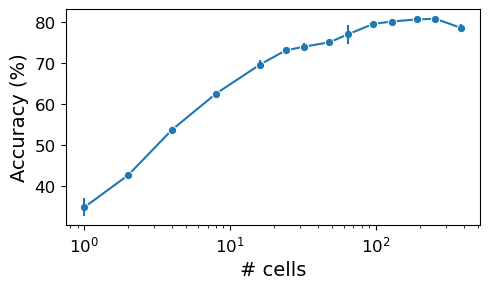

In [3]:

accuracy_col = 'accuracy'


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & \
    ((runs_df['single_cell_augmentation'] == False) | (runs_df['data.group_size'] == 1))

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

# filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True)
# plt.scatter(runs_df[filter_]['data.group_size'], 100*runs_df[filter_][accuracy_col])

# plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
# plt.xlim([.9, 200])
plt.xscale('log')
plt.xlabel("# cells")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
# plt.savefig("../figures/group_size.png")

Text(0, 0.5, 'Accuracy (%)')

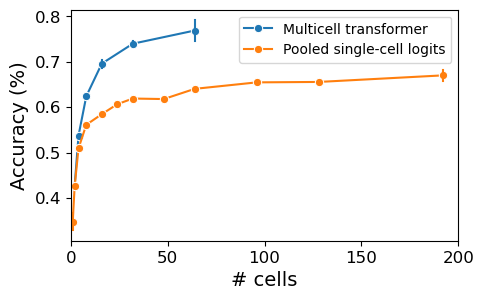

In [4]:
accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['single_cell_augmentation'] == False) & (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) #& (runs_df['state'] == 'finished')
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
plt.xlim([0, 200])

plt.xlabel("# cells")
plt.ylabel("Accuracy (%)")

Just a plot of pooled single-cell accuracy

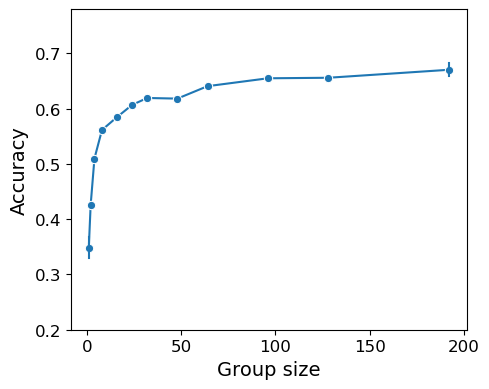

In [5]:


accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)

plt.figure(figsize=(5, 4))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


# plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
# plt.xlim([.9, 200])
# plt.xscale('log')
plt.ylim([.2,.78])
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
# plt.savefig("../figures/group_size_single_cell_pooling.png")

### Train all cells towards their resepctive labels

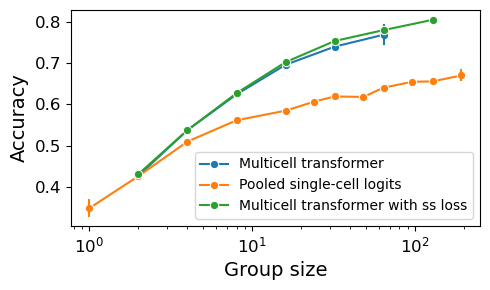

In [6]:


accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['single_cell_augmentation'] == False) & (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer', 'Pooled single-cell logits', 'Multicell transformer with ss loss'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_ss_loss.png", dpi=300)

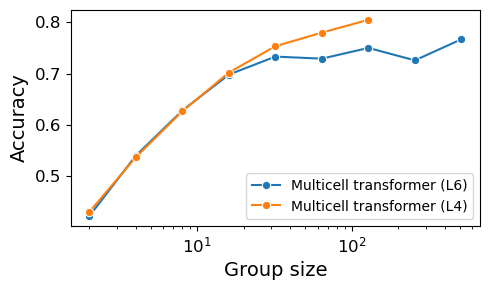

In [3]:


accuracy_col = 'eval/accuracy'

tags = [["group_size_ss_loss_L6"]]
filter_ = runs_df['wandb.tags'].isin(tags) &  (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer (L6)', 'Multicell transformer (L4)'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("set_depth_acc.png", dpi=300)

Seems not to help much, but maybe a little bit.

Next let's plot the single-cell prediction accuracy for the model trained also on single-cell labels.

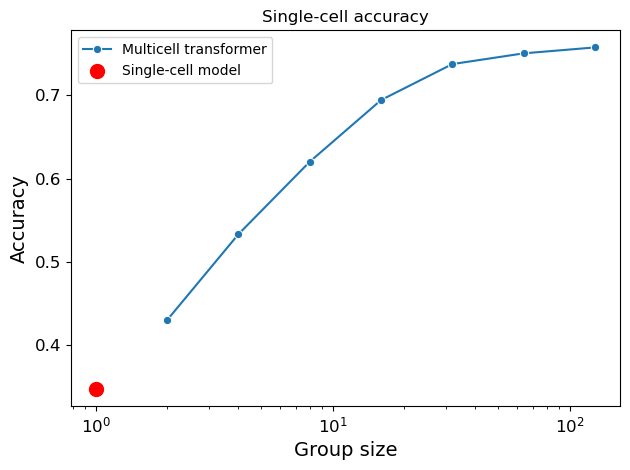

In [7]:

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['data.group_size'] == 1)  & (runs_df['train/epoch'] > 40)
# get average accuracy
single_cell_accuracy = runs_df[filter_]['eval/accuracy'].mean()
# plot as single point at y=single_cell_accuracy, x=1
plt.scatter(1, single_cell_accuracy, color='red', s=100)

plt.legend(['Multicell transformer', 'Single-cell model', ])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Single-cell accuracy")
plt.tight_layout()
plt.savefig("ss_predictions_with_group_size.png", dpi=300)


### Using relative locations of the cells from the centroid

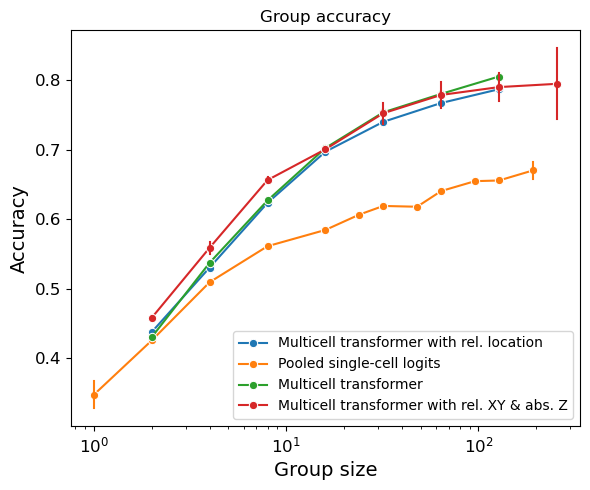

In [10]:


accuracy_col = 'eval/accuracy'

tags = [["group_size_rel_pos"]]
filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)

plt.figure(figsize=(6, 5))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["group_size_rel_pos_absZ"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer with rel. location', 'Pooled single-cell logits', 'Multicell transformer', 'Multicell transformer with rel. XY & abs. Z'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Group accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_rel_pos.png", dpi=300)


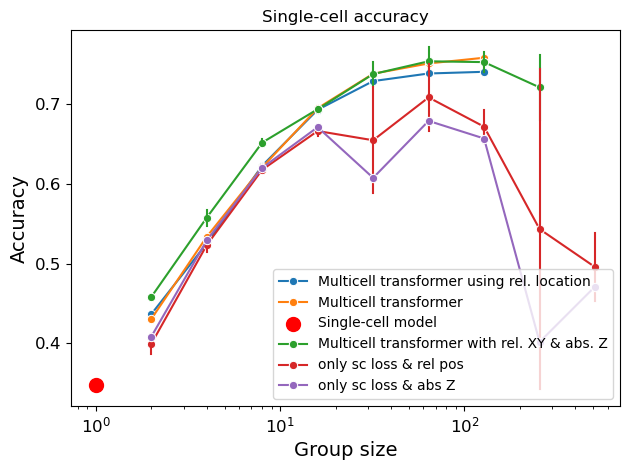

In [19]:



tags = [["group_size_rel_pos"]]
filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['data.group_size'] == 1)  & (runs_df['train/epoch'] > 40)
# get average accuracy
single_cell_accuracy = runs_df[filter_]['eval/accuracy'].mean()
# plot as single point at y=single_cell_accuracy, x=1
plt.scatter(1, single_cell_accuracy, color='red', s=100)

tags = [["group_size_rel_pos_absZ"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [f"only_ss_loss_{b}" for b in [2, 4, 8, 16, 32, 64, 128, 256, 512]]
filter_ = runs_df['wandb.tags'].apply(lambda x: any(tag in x for tag in tags)) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [f"only_ss_loss_absZ_{b}" for b in [2, 4, 8, 16, 32, 64, 128, 256, 512]]
filter_ = runs_df['wandb.tags'].apply(lambda x: any(tag in x for tag in tags)) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")



plt.legend(['Multicell transformer using rel. location',  'Multicell transformer', 'Single-cell model',  'Multicell transformer with rel. XY & abs. Z', 
            "only sc loss & rel pos", "only sc loss & abs Z"])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Single-cell accuracy")
plt.tight_layout()
plt.savefig("sc_predictions_with_rel_pos.png", dpi=300)


In [17]:
runs_df['wandb.tags'].isin(tags).sum()

0

<Axes: xlabel='data.group_size', ylabel='eval/cell_accuracy'>

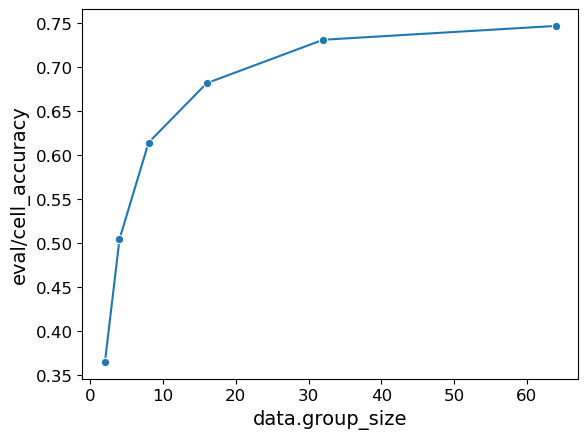

In [6]:

tags = [["group_size_class_weights"]]
filter_ = runs_df['wandb.tags'].isin(tags)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")

#### Benchmarks

In [2]:
runs = api.runs("zadorlab/benchmarks-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

# Concatenate the flattened DataFrames along with the 'name' column
benchmark_runs_df = pd.concat([summary_df, config_df], axis=1)
benchmark_runs_df.head(15)
print(len(benchmark_runs_df))

294


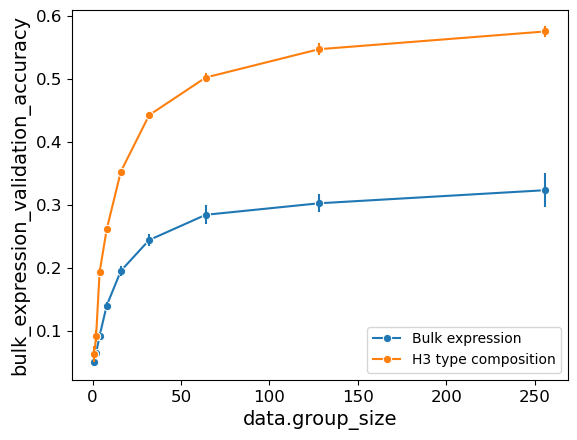

In [3]:

tags = [["benchmarks_h3fix"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='h3type_test_accuracy', marker='o', errorbar="sd", err_style="bars")


plt.legend(['Bulk expression', 'H3 type composition', 
        ])

Now in the case without class balancing (`benchmarks_unbalanced`), also comparing logistic regression as well as the debug case of running the model on the direct adatas (`benchmarks_adata`).

/grid/zador/home/benjami/micromamba/envs/brain_annotation/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/grid/zador/home/benjami/micromamba/envs/brain_annotation/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/grid/zador/home/benjami/micromamba/envs/brain_annotation/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/grid/zador/home/benjami/micromamba/envs/brain_annotation/lib/python3.11/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a s

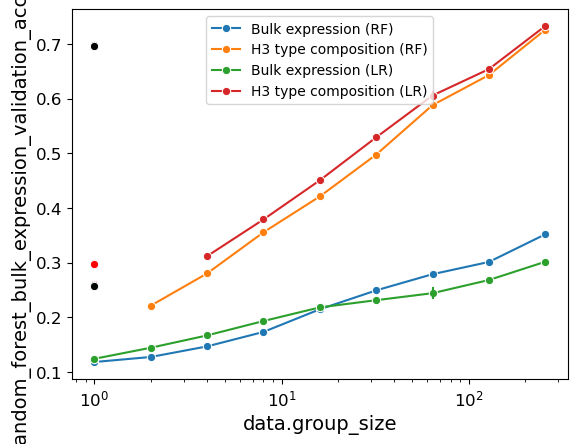

In [8]:

tags = [["benchmarks_unbalanced"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["benchmarks_adata"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')

tags = [["benchmarks_adata_resample"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')


plt.legend(['Bulk expression (RF)', 'H3 type composition (RF)', 'Bulk expression (LR)', 'H3 type composition (LR)', 
        ])
plt.xscale('log')

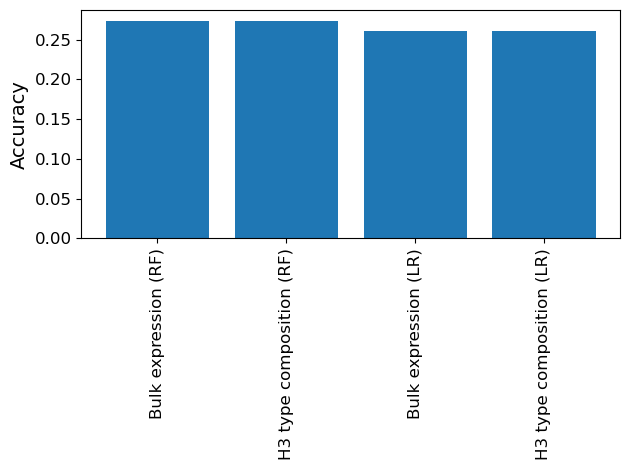

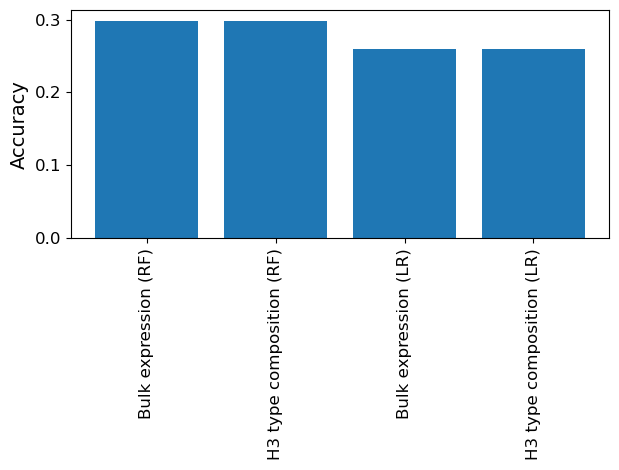

In [ ]:
tags = [["benchmarks_adata_resample"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
r = benchmark_runs_df[filter_][['random_forest_bulk_expression_test_accuracy','random_forest_h3type_test_accuracy', 
                            'logistic_regression_bulk_expression_test_accuracy', 'logistic_regression_h3type_test_accuracy']].mean()
# plot as a bar plot
plt.bar(range(4), r)
plt.xticks(range(4), ['Bulk expression (RF)', 'H3 type composition (RF)', 'Bulk expression (LR)', 'H3 type composition (LR)'], rotation=90);
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

/tmp/ipykernel_64360/3238860391.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


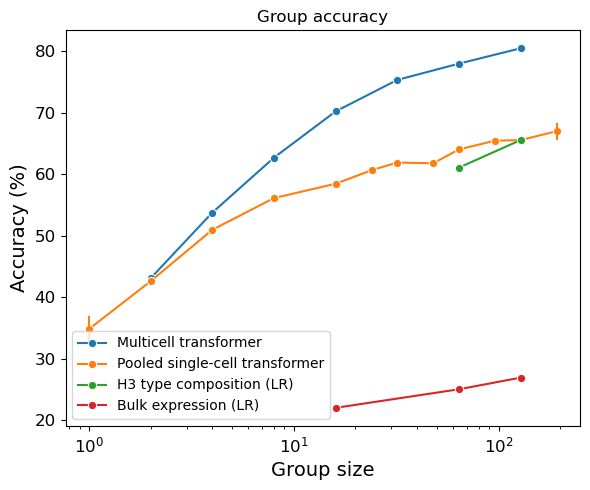

In [7]:
accuracy_col = 'eval/accuracy'

# tags = [["group_size_rel_pos"]]
# filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)

plt.figure(figsize=(6, 5))

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags)  & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["benchmarks_unbalanced"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")


plt.legend(['Multicell transformer', 'Pooled single-cell transformer', 'H3 type composition (LR)', 'Bulk expression (LR)',])

# Relabel the y-axis ticks to multiply the labels by 100
current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])

plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy (%)")
plt.title("Group accuracy")
plt.tight_layout()
# plt.savefig("group_predictions_with_benchmarks_log.png", dpi=300)


/tmp/ipykernel_1699862/2994435038.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


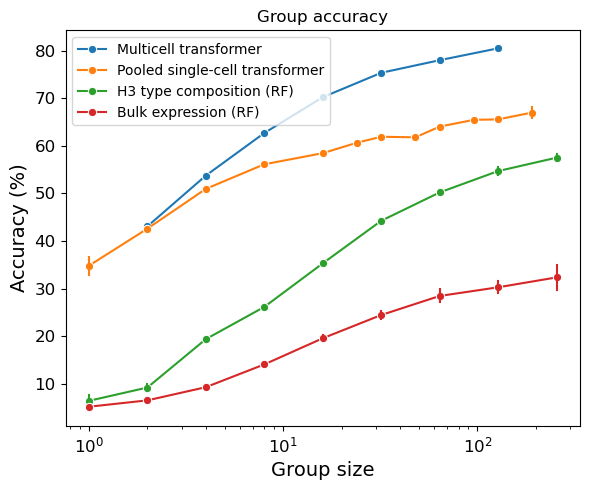

In [8]:


accuracy_col = 'eval/accuracy'

# tags = [["group_size_rel_pos"]]
# filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)

plt.figure(figsize=(6, 5))

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags)  & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["benchmarks_h3fix"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='h3type_test_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")


plt.legend(['Multicell transformer', 'Pooled single-cell transformer', 'H3 type composition (RF)', 'Bulk expression (RF)',])

# Relabel the y-axis ticks to multiply the labels by 100
current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])

plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy (%)")
plt.title("Group accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_benchmarks_log.png", dpi=300)


<Axes: xlabel='random_forest.n_estimators', ylabel='bulk_expression_validation_accuracy'>

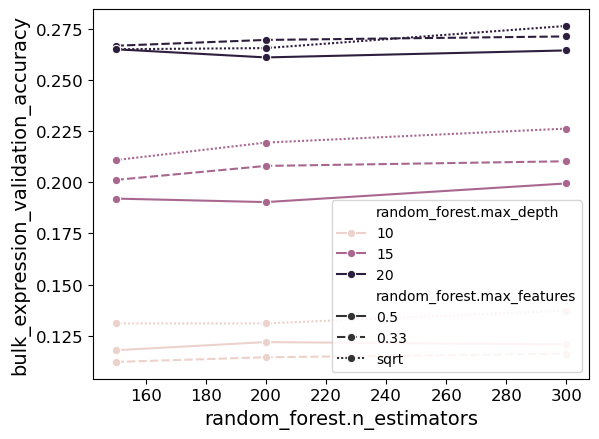

In [ ]:

tags = [["rf_search"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='random_forest.n_estimators', y='bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", 
             hue='random_forest.max_depth', style='random_forest.max_features')

# sns.lineplot(benchmark_runs_df[filter_], x='random_forest.n_estimators', y='bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")




Why is it better than pooled single-cell logits?
- think of a shuffled control 

Are certain cells more informative than others?
 1) Assume that H3_types are the equivalent as these types, and stratify performance by H3_types
 2) Bootstrap the pooling (resample) 

Do cells contain independent information about the labels?
- Pool within vs. across cell types. Is there a difference in improvement?


Application: alignment between two brains. A distrance metric between two brains
 - with smoothness constraint
 - ideal for comparing two brains with different conditions

Building a new atlas...